# Import packages

In [499]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

**IMPORT DATA**

In [269]:
DF=pd.read_csv("C:/Users/asali/Downloads/Doctor/KaggleV2-May-2016.csv")

In [49]:
DF

**Data Analysis**

In [9]:
DF.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [23]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Feature Engineering

### Changing string to Datetime format

In [270]:
DF['AppointmentDay']=DF['AppointmentDay'].str.slice(0, -10)
DF['ScheduledDay']=DF['ScheduledDay'].str.slice(0, -10)

In [271]:
DF['AppointmentDay']=pd.to_datetime(DF['AppointmentDay'])
DF['ScheduledDay']=pd.to_datetime(DF['ScheduledDay'])

### Creating a new column to find the difference between scheduled and appointed date

In [272]:
DF['DaysToVisit']=DF['AppointmentDay']-DF['ScheduledDay']

In [273]:
DF['DaysToVisit']=DF.DaysToVisit.dt.days

In [274]:
len(DF['DaysToVisit'].unique())

131

### Creating new column for day of week

In [212]:
DF['weekday'] =DF['AppointmentDay'].dt.weekday

### Creating number of patients in neighbouhood

In [275]:
DF['Region']=DF.groupby('Neighbourhood')['PatientId'].transform('count')

In [214]:
DF

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysToVisit,weekday,Region
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,3877
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,3877
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,644
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,69
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,3877
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,4,835
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,700
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,700
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,4,2262
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2,4,849


### Creating column to count number of patients visiting

In [124]:
DF.loc[DF['PatientId'] == 298725]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysToVisit,weekday,Region


In [276]:
DF=DF.iloc[::-1]

In [277]:
DF['CountOfPat']= DF.groupby('PatientId').cumcount()+1

In [217]:
DF

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysToVisit,weekday,Region,CountOfPat
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41,1,5805,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,1,5805,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,1,5805,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,1,5805,1
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,1,5805,1
110521,3.635534e+13,5651072,F,2016-05-03,2016-06-07,53,MARIA ORTIZ,0,0,0,0,0,1,No,35,1,5805,1
110520,9.969977e+14,5650534,F,2016-05-03,2016-06-07,42,MARIA ORTIZ,0,0,0,0,0,1,No,35,1,5805,1
110519,6.542388e+13,5630447,F,2016-04-27,2016-06-07,22,MARIA ORTIZ,0,0,0,0,0,1,No,41,1,5805,1
110518,7.263315e+13,5630375,F,2016-04-27,2016-06-07,50,MARIA ORTIZ,0,0,0,0,0,1,No,41,1,5805,1
110517,5.574942e+12,5780122,F,2016-06-07,2016-06-07,19,MARIA ORTIZ,0,0,0,0,0,0,No,0,1,5805,1


In [278]:
DF.groupby("No-show").count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToVisit,Region,CountOfPat
No-show,,,,,,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


In [ ]:
len(DF[DF["No-show"] == "No"])

In [149]:
len(DF[DF["No-show"] == "Yes"])

22319

In [218]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 110526 to 0
Data columns (total 18 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
DaysToVisit       110527 non-null int64
weekday           110527 non-null int64
Region            110527 non-null int64
CountOfPat        110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(12), object(3)
memory usage: 15.2+ MB


# Modelling

In [288]:
newDF=DF

In [357]:
dic={'F':0,'M':1}
newDF=newDF.replace({"Gender": dic})

In [ ]:
newDF

In [226]:
del newDF['ScheduledDay']
del newDF['AppointmentDay']
del newDF['Neighbourhood']

In [297]:
X = newDF["No-show"]
Y = newDF.drop(["No-show"],1)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(Y, X, train_size=0.8, random_state=42)

C:\Users\asali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [245]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [246]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
4,GradientBoostingClassifier,79.720438
1,GaussianNB,79.693296
3,LogisticRegression,79.693296
2,RandomForestClassifier,79.313309
0,ExtraTreesClassifier,78.788564
6,KNeighborsClassifier,76.816249
5,DecisionTreeClassifier,72.306161


In [247]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[17602    15]
 [ 4468    21]]


             precision    recall  f1-score   support

         No       0.80      1.00      0.89     17617
        Yes       0.58      0.00      0.01      4489

avg / total       0.75      0.80      0.71     22106



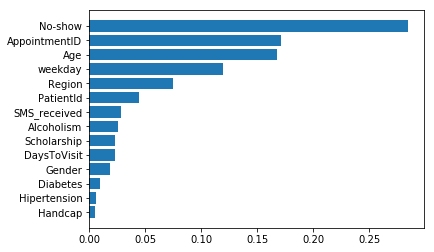

In [254]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

imp=model.feature_importances_
names=newDF.columns

imp,names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp, align='center')
plt.yticks(range(len(names)),names)
plt.show()

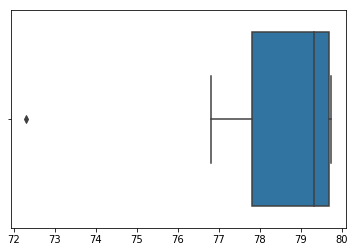

In [260]:
sns.boxplot(x)

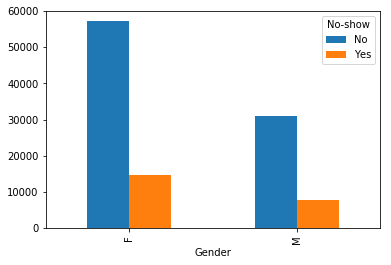

In [261]:
pd.crosstab(DF['Gender'],DF['No-show']).plot.bar()

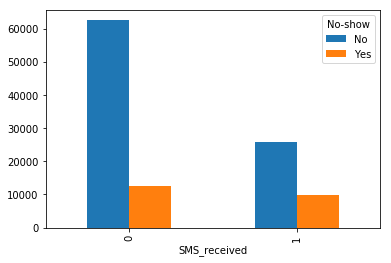

In [265]:
pd.crosstab(DF['SMS_received'],DF['No-show']).plot.bar()

In [268]:
DF.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'DaysToVisit', 'weekday', 'Region', 'CountOfPat'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

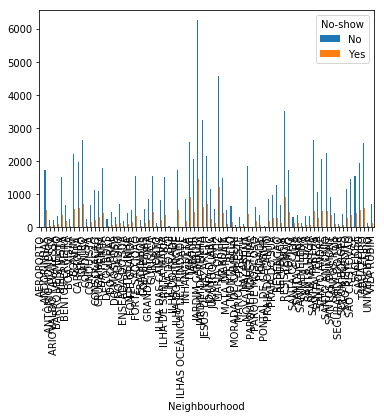

In [280]:

pd.crosstab(DF['Neighbourhood'],DF['No-show'])

# Undersampling the imbalanced dataset  

In [294]:
newDF.rename(columns = {'No-show':'Noshow'}, inplace = True)

0.25302693633230544

In [533]:
trainingSet, testSet = train_test_split(newDF, test_size=0.2)

In [534]:
len(trainingSet[trainingSet["Noshow"] == "Yes"])

17853

In [535]:
undersample_1 = trainingSet[trainingSet.Noshow == 'No'].index
random_indices = np.random.choice(undersample_1, 17856, replace=False)
unndersample_1 = trainingSet.loc[random_indices]

In [536]:
undersample_2=trainingSet[trainingSet['Noshow']=='Yes']

In [537]:
frames=[undersample_1,undersample_2]

In [538]:
train_undersample=pd.concat(frames)

In [539]:
X_train = train_undersample.drop(["Noshow"],1)
Y_train = train_undersample["Noshow"]

In [540]:
X_test = testSet.drop(["Noshow"],1)
Y_test = testSet["Noshow"]

In [448]:
del X_test['PatientId']

In [449]:
del X_train['PatientId']

In [541]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,Y_train)
    x.append(model.score(X_test,Y_test)*100)

In [542]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
3,LogisticRegression,79.797340
0,ExtraTreesClassifier,65.724238
2,RandomForestClassifier,65.697096
5,DecisionTreeClassifier,60.494888
4,GradientBoostingClassifier,58.052113
6,KNeighborsClassifier,51.687325
1,GaussianNB,30.584457


In [545]:
for model in models:
    #model = LogisticRegression()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Model is",model)
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

Model is ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
[[11781  5859]
 [ 1759  2707]]


             precision    recall  f1-score   support

         No       0.87      0.67      0.76     17640
        Yes       0.32      0.61      0.42      4466

avg / total       0.76      0.66      0.69     22106

Model is GaussianNB(priors=None)
[[ 3067 14573]
 [  772  3694]]


             precision    recall  f1-score   support

         No       0.80      0.17      0.29     17640
        Yes       0.20      0.83      0.32      4466

avg / total       0.68      0.31      0.29     22106

Model is RandomForestClassifier(bootstrap=True, class_weigh

C:\Users\asali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         No       0.80      1.00      0.89     17640
        Yes       0.00      0.00      0.00      4466

avg / total       0.64      0.80      0.71     22106

Model is GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
[[9091 8549]
 [ 724 3742]]


             precision    recall  f1-score   support

         No       0.93      0.52      0.66     17640
        Yes       0.30      0.84      0.45      4466

avg / total       0.80      0.58      0.62     22106

Model is DecisionTreeClassifier(class_weight=None, criterion=

# Oversampling


In [557]:
trainingSet, testSet = train_test_split(newDF, test_size=0.2)

In [547]:
len(trainingSet[trainingSet["Noshow"] == "No"])

70492

In [548]:
len(trainingSet[trainingSet["Noshow"] == "Yes"])

17929

In [549]:
len(trainingSet[trainingSet["Noshow"] == "No"])/len(trainingSet[trainingSet["Noshow"] == "Yes"])

3.9317307156004238

In [558]:
is_yes = trainingSet['Noshow'] == 'Yes'
df_yes = trainingSet[is_yes]
trainingSet=trainingSet.append([df_yes]*3,ignore_index=True)

In [559]:
X_train = trainingSet.drop(["Noshow"],1)
Y_train = trainingSet["Noshow"]

In [560]:
X_test = testSet.drop(["Noshow"],1)
Y_test = testSet["Noshow"]

In [469]:
del X_test['PatientId']

In [468]:
del X_train['PatientId']

In [561]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,Y_train)
    x.append(model.score(X_test,Y_test)*100)

In [563]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
0,ExtraTreesClassifier,79.001176
2,RandomForestClassifier,77.019814
5,DecisionTreeClassifier,73.323984
4,GradientBoostingClassifier,58.269248
6,KNeighborsClassifier,54.333665
1,GaussianNB,26.381978
3,LogisticRegression,19.931240


In [556]:
for model in models:
    #model = ExtraTreesClassifier()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("model is",model)
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

model is ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
[[16849   867]
 [ 3792   598]]


             precision    recall  f1-score   support

         No       0.82      0.95      0.88     17716
        Yes       0.41      0.14      0.20      4390

avg / total       0.74      0.79      0.74     22106

model is GaussianNB(priors=None)
[[ 1848 15868]
 [  453  3937]]


             precision    recall  f1-score   support

         No       0.80      0.10      0.18     17716
        Yes       0.20      0.90      0.33      4390

avg / total       0.68      0.26      0.21     22106

model is RandomForestClassifier(bootstrap=True, class_weigh

C:\Users\asali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         No       0.00      0.00      0.00     17716
        Yes       0.20      1.00      0.33      4390

avg / total       0.04      0.20      0.07     22106

model is GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
[[9217 8499]
 [ 716 3674]]


             precision    recall  f1-score   support

         No       0.93      0.52      0.67     17716
        Yes       0.30      0.84      0.44      4390

avg / total       0.80      0.58      0.62     22106

model is DecisionTreeClassifier(class_weight=None, criterion=

# Oversampling using SMOTE

In [515]:
#features=credit_cards[features_columns]
#labels=credit_cards['Class']

X = newDF.drop(["Noshow"],1)
Y = newDF["Noshow"]

In [516]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

C:\Users\asali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [517]:
oversampler=SMOTE(random_state=42)
X_train,Y_train=oversampler.fit_sample(X_train,Y_train)

In [518]:
len(Y_train[Y_train=='Yes'])

70591

In [519]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,Y_train)
    x.append(model.score(X_test,Y_test)*100)

In [520]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
3,LogisticRegression,79.693296
4,GradientBoostingClassifier,78.987605
0,ExtraTreesClassifier,77.467656
2,RandomForestClassifier,77.404325
5,DecisionTreeClassifier,70.550982
6,KNeighborsClassifier,61.286529
1,GaussianNB,30.254230


In [532]:
for model in models:
    #model = DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Model is ",model)
    print(confusion_matrix(Y_test, Y_pred))
    print('\n')
    print(classification_report(Y_test, Y_pred))

Model is  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
[[16300  1317]
 [ 3586   903]]


             precision    recall  f1-score   support

         No       0.82      0.93      0.87     17617
        Yes       0.41      0.20      0.27      4489

avg / total       0.74      0.78      0.75     22106

Model is  GaussianNB(priors=None)
[[ 2944 14673]
 [  745  3744]]


             precision    recall  f1-score   support

         No       0.80      0.17      0.28     17617
        Yes       0.20      0.83      0.33      4489

avg / total       0.68      0.30      0.29     22106

Model is  RandomForestClassifier(bootstrap=True, class_we

C:\Users\asali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         No       0.80      1.00      0.89     17617
        Yes       0.00      0.00      0.00      4489

avg / total       0.64      0.80      0.71     22106

Model is  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
[[17043   574]
 [ 4071   418]]


             precision    recall  f1-score   support

         No       0.81      0.97      0.88     17617
        Yes       0.42      0.09      0.15      4489

avg / total       0.73      0.79      0.73     22106

Model is  DecisionTreeClassifier(class_weight=None, crit

# Choosing the right model

I am choosing DecisionTreeClassifier() model as the most optimal modelas that model predicts 4414 patients that will show up for rthe appointment and the actual number of patients attending is 4406 which is  very close.

In [565]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

[[14755  2945]
 [ 2937  1469]]


             precision    recall  f1-score   support

         No       0.83      0.83      0.83     17700
        Yes       0.33      0.33      0.33      4406

avg / total       0.73      0.73      0.73     22106



In [569]:
model.feature_importances_

array([0.20009993, 0.21695338, 0.01637383, 0.13890229, 0.01125163,
       0.00966309, 0.00635849, 0.00493074, 0.00410637, 0.0075581 ,
       0.22080076, 0.12193315, 0.04106824])

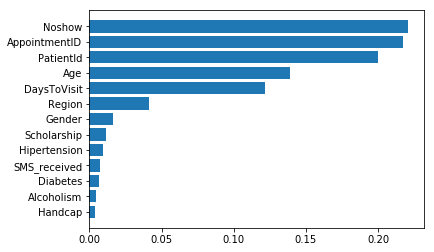

In [570]:
imp=model.feature_importances_
names=newDF.columns

imp,names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp, align='center')
plt.yticks(range(len(names)),names)
plt.show()